<a href="https://colab.research.google.com/github/leandrolazaro/Asymmetrical_traveler_postman-TP2-AEDS1-UFV/blob/master/Supervisionado_CCF425_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
df = pd.read_csv("drive/MyDrive/Disciplinas/CCF425/Dados-CCF425-2022-01-V2.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data_nascimento            22 non-null     object 
 1   ano_entrada_curso          22 non-null     int64  
 2   sexo                       22 non-null     object 
 3   altura_cm                  22 non-null     float64
 4   time                       22 non-null     object 
 5   cidade_nascimento          22 non-null     object 
 6   nota_enem                  22 non-null     float64
 7   perspectiva_futura         22 non-null     object 
 8   esporte_favorito           22 non-null     object 
 9   participa_minascoders      22 non-null     object 
 10  cra_atual                  22 non-null     float64
 11  creditos_atual             21 non-null     float64
 12  meio_transporte_frequente  22 non-null     object 
 13  idade                      22 non-null     int64  
d

# Transformar categorias em numérico

In [ ]:
df['sexo'] = df['sexo'].apply(lambda x: 1 if x == 'Feminino' else 0)

In [ ]:
df['participa_minascoders'] = df['participa_minascoders'].apply(lambda x: 1 if x == 'Sim' else 0)

In [ ]:
df['cidade_nascimento'] = df["cidade_nascimento"].astype('category')
df['cidade_nascimento'] = df['cidade_nascimento'].cat.codes

In [ ]:
df = pd.get_dummies(df, columns=["time"])

In [ ]:
df['meio_transporte_frequente'] = df["meio_transporte_frequente"].astype('category')
df['meio_transporte_frequente'] = df['meio_transporte_frequente'].cat.codes

# Criar variável alvo: acima_media_cra

In [ ]:
media_cra = df['cra_atual'].mean()
df['cra_acima_media'] = df['cra_atual'].apply(lambda x: 1 if x > media_cra else 0)

In [ ]:
df.head()

,data_nascimento,ano_entrada_curso,sexo,altura_cm,cidade_nascimento,nota_enem,perspectiva_futura,esporte_favorito,participa_minascoders,cra_atual,...,meio_transporte_frequente,idade,time_Cruzeiro Série B,time_Dorense F.C.,time_Flamengo,time_Galo Doido Série A,time_Nenhum,time_Remo,time_Vasco,cra_acima_media
0,1999-07-28,2020,1,169.0,0,656.93,Em 2023,Volei,1,83.9,...,3,22,1,0,0,0,0,0,0,1
1,1997-06-02,2017,0,185.0,11,666.00,trabahar,Nenhum,0,63.5,...,3,24,0,0,0,0,1,0,0,0
2,1999-06-09,2019,0,165.0,1,645.00,Espero ganhar uma boa remuneração,Natação,0,75.0,...,0,22,0,0,0,0,0,1,0,1
3,1997-07-15,2016,0,175.0,0,689.00,pode trabalhar,cs:go,0,57.2,...,3,24,0,0,0,1,0,0,0,0
4,1999-01-22,2017,0,184.0,0,660.00,Me formar e conseguir um bom emprego na área,Futebol,0,62.5,...,3,23,1,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['data_nascimento', 'ano_entrada_curso', 'sexo', 'altura_cm',
       'cidade_nascimento', 'nota_enem', 'perspectiva_futura',
       'esporte_favorito', 'participa_minascoders', 'cra_atual',
       'creditos_atual', 'meio_transporte_frequente', 'idade',
       'time_Cruzeiro Série B', 'time_Dorense F.C.', 'time_Flamengo',
       'time_Galo Doido Série A', 'time_Nenhum', 'time_Remo', 'time_Vasco',
       'cra_acima_media'],
      dtype='object')

# Analiser correlações

In [ ]:
cols_interesse = ['ano_entrada_curso','sexo','altura_cm','cidade_nascimento','participa_minascoders',
                  'nota_enem','meio_transporte_frequente','idade','time_Cruzeiro Série B', 'time_Dorense F.C.', 
                  'time_Flamengo', 'time_Galo Doido Série A', 'time_Nenhum', 'time_Remo', 'time_Vasco']
target = 'cra_acima_media'

In [ ]:
cols_interesse_all = cols_interesse.copy()
cols_interesse_all.append(target)
df[cols_interesse_all]

,ano_entrada_curso,sexo,altura_cm,cidade_nascimento,participa_minascoders,nota_enem,meio_transporte_frequente,idade,time_Cruzeiro Série B,time_Dorense F.C.,time_Flamengo,time_Galo Doido Série A,time_Nenhum,time_Remo,time_Vasco,cra_acima_media
0,2020,1,169.0,0,1,656.93,3,22,1,0,0,0,0,0,0,1
1,2017,0,185.0,11,0,666.00,3,24,0,0,0,0,1,0,0,0
2,2019,0,165.0,1,0,645.00,0,22,0,0,0,0,0,1,0,1
3,2016,0,175.0,0,0,689.00,3,24,0,0,0,1,0,0,0,0
4,2017,0,184.0,0,0,660.00,3,23,1,0,0,0,0,0,0,0
5,2018,0,180.0,8,0,706.00,2,21,0,0,0,0,0,0,1,0
6,2019,1,168.0,0,1,686.00,4,21,0,0,0,1,0,0,0,1
7,2019,0,164.0,5,0,672.00,3,20,1,0,0,0,0,0,0,1
8,2016,0,176.0,13,0,715.00,3,26,1,0,0,0,0,0,0,0
9,2020,0,170.0,9,0,666.00,3,20,0,0,0,0,1,0,0,1


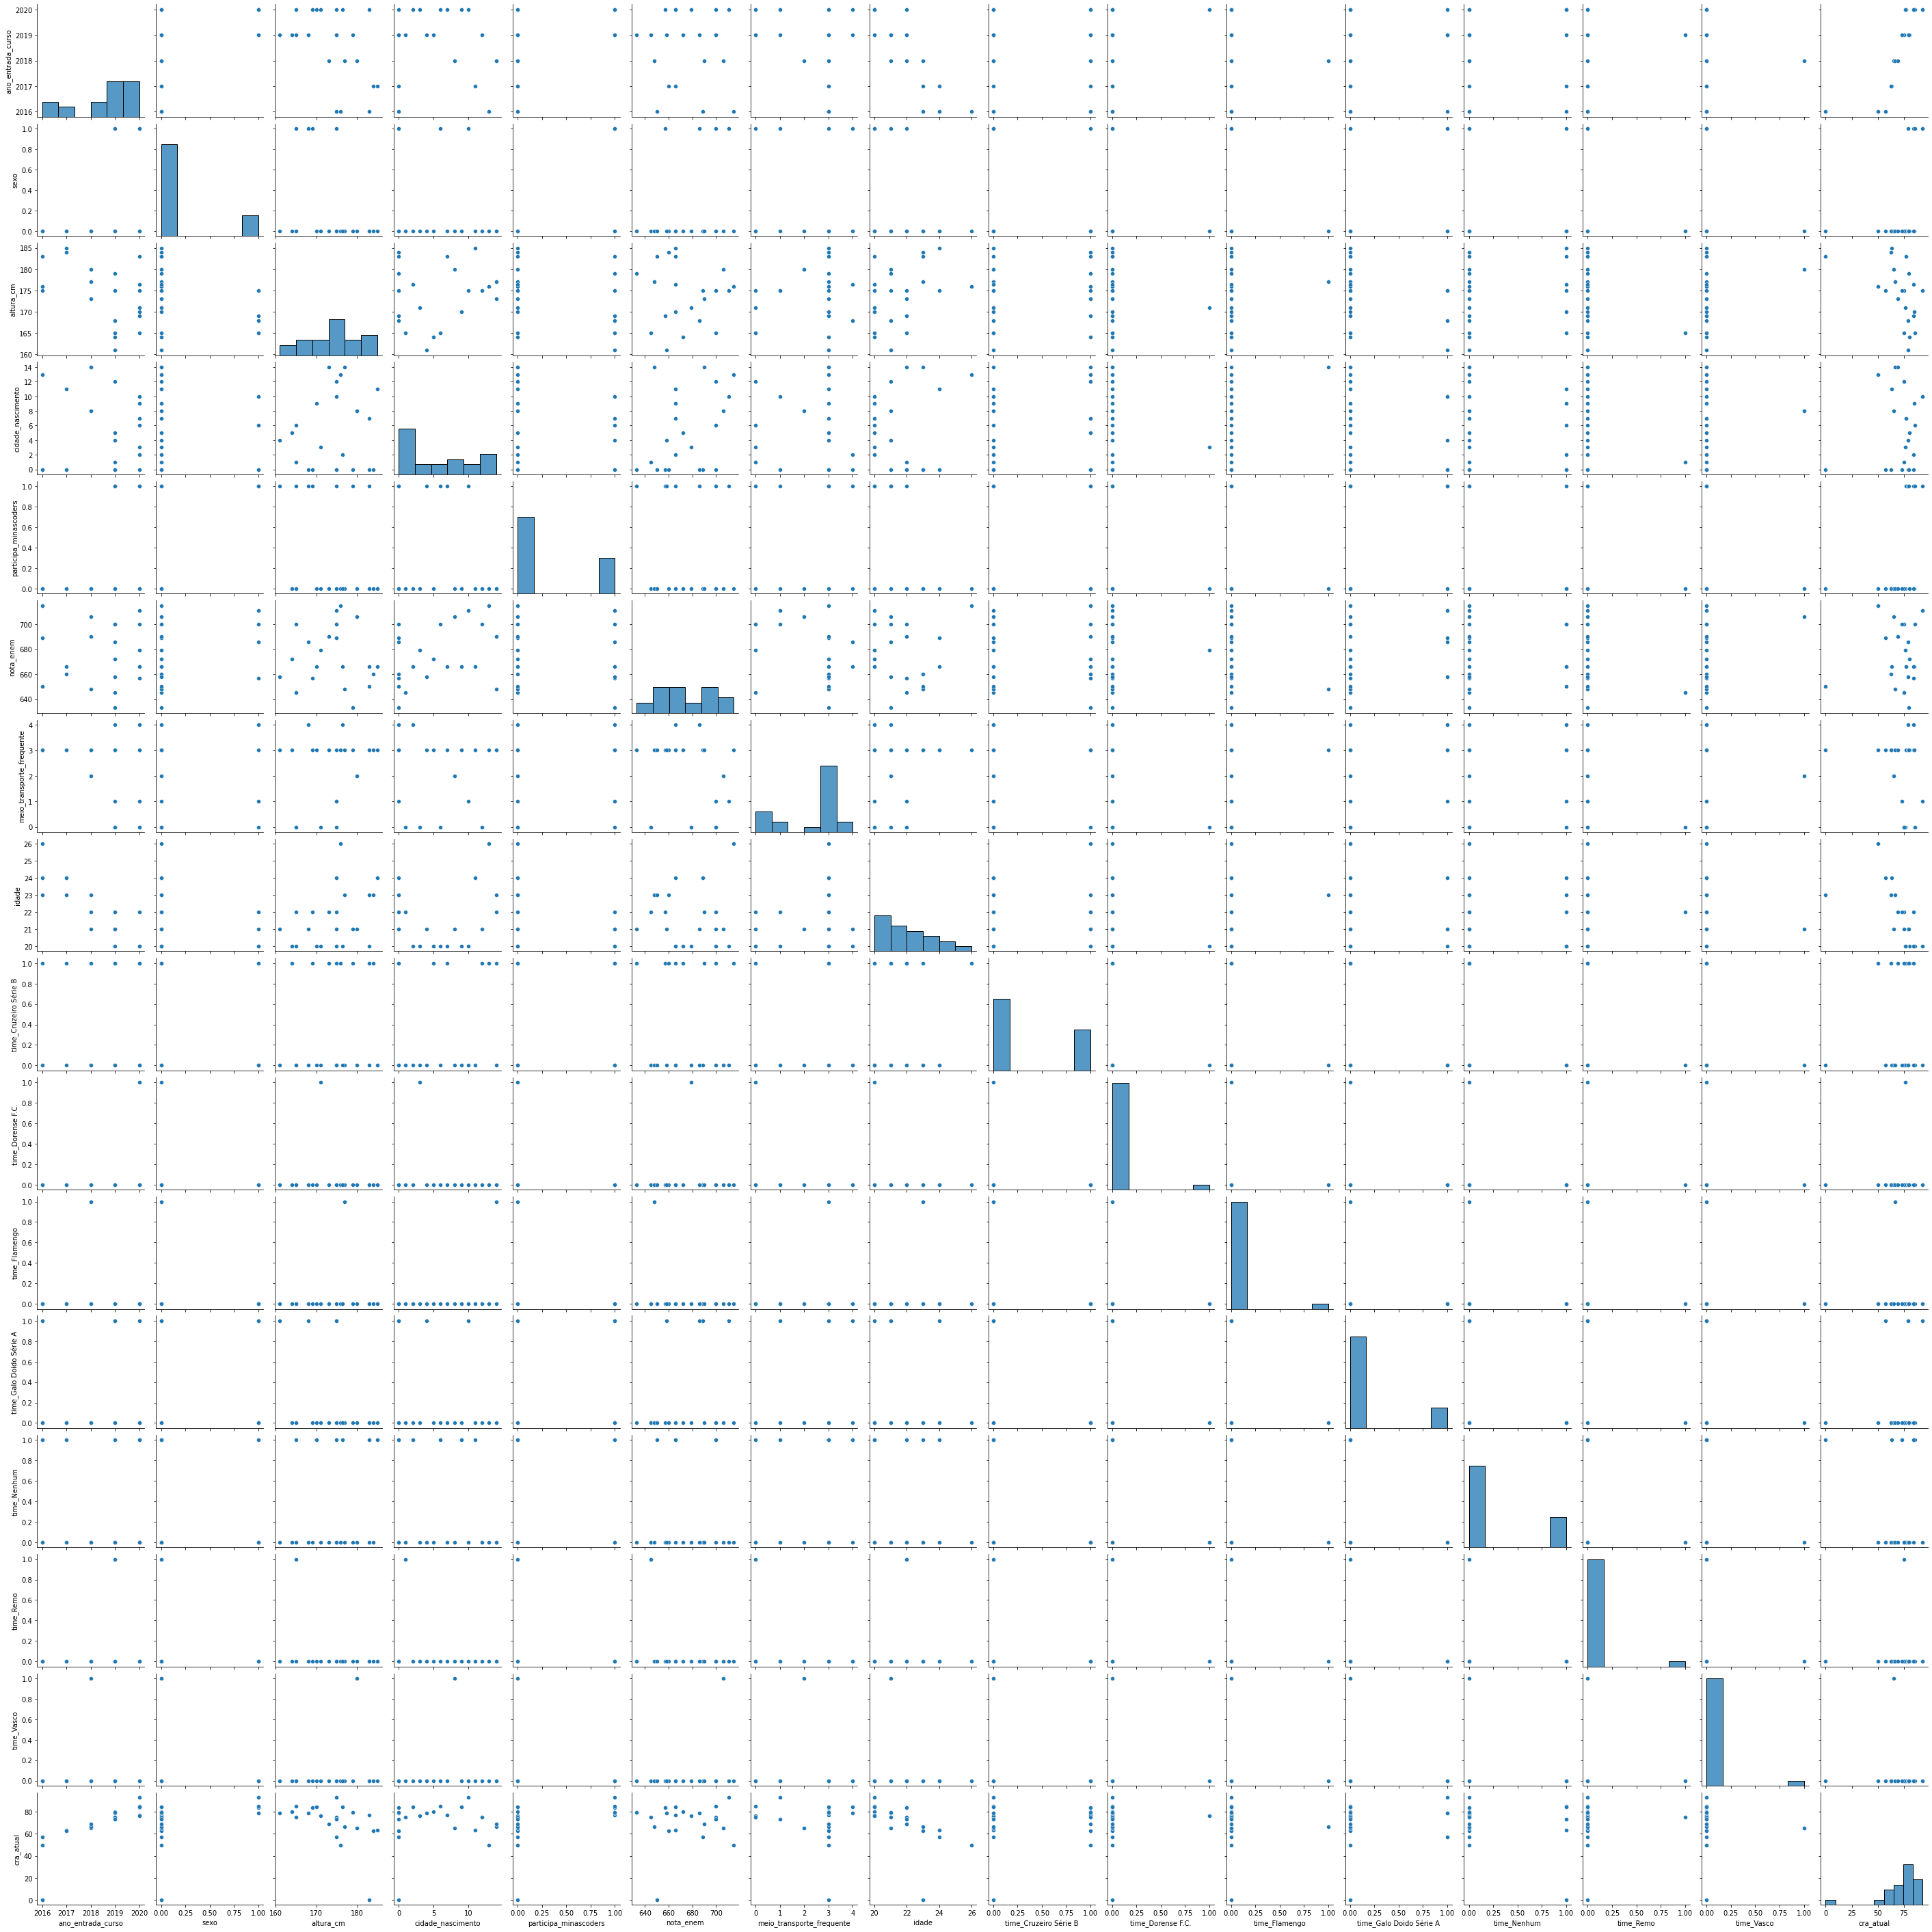

In [ ]:
sns.pairplot(df[cols_interesse_all])

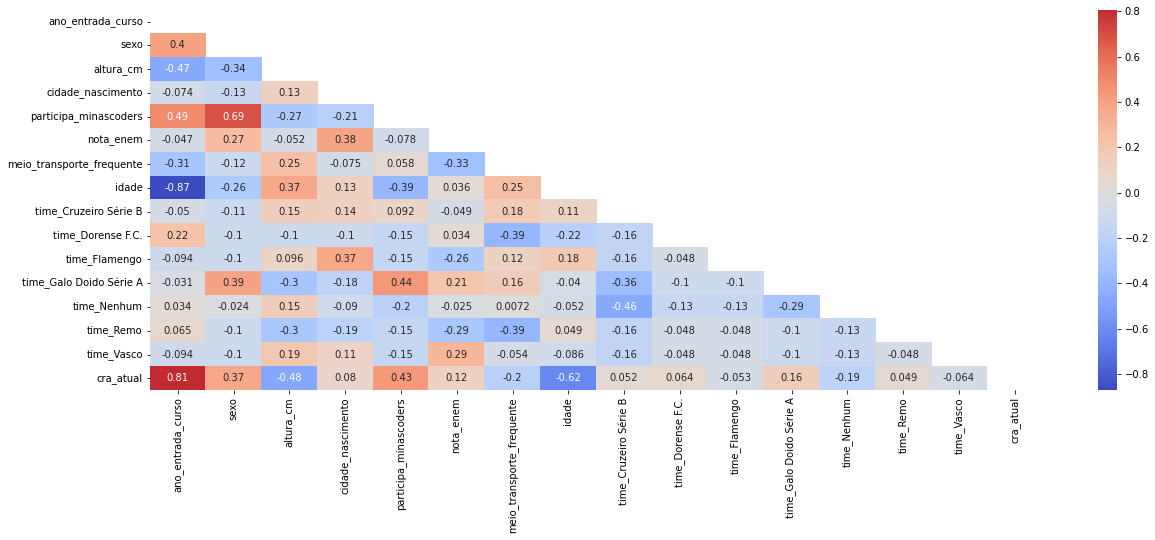

In [ ]:
# Uma medida importante para verificar a relação entre as variáveis  é o coeficiente de pearson
Var_Corr = df[cols_interesse_all].corr()
matrix = np.triu(df[cols_interesse_all].corr())

plt.figure(figsize = (20,7))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,\
            annot=True,center= 0, cmap= 'coolwarm',mask=matrix)

# Classificação

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def classifier(X_train,X_test,Y_train,Y_test):
    #Aplicando KNN
    print(" KNN ")
    ini = time.time() #Inicio do calculo do tempo

    knn=KNeighborsClassifier()
    knn.fit(X_train,Y_train)

    end = time.time()
    knn_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,knn.predict(X_test)))
    print(confusion_matrix(Y_test, knn.predict(X_test)))
    print()
    
    #Aplicando Arvore de Decisao
    print("Árvore de Decisão")
    ini = time.time() #Inicio do calculo do tempo

    dtc=tree.DecisionTreeClassifier()
    dtc.fit(X_train,Y_train)

    end = time.time()
    dtc_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,dtc.predict(X_test)))
    print(confusion_matrix(Y_test, dtc.predict(X_test)))

Y = df[target]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df['sexo'],Y,test_size=0.2, random_state=0)
classifier(X_train.values.reshape(-1, 1),X_test.values.reshape(-1, 1),Y_train,Y_test)

 KNN 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5

[[2 0]
 [2 1]]

Árvore de Decisão
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

[[0 2]
 [0 3]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['ano_entrada_curso','altura_cm']],Y,test_size=0.2, random_state=0)
classifier(X_train,X_test,Y_train,Y_test)

 KNN 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

[[1 1]
 [1 2]]

Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[2 0]
 [0 3]]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['ano_entrada_curso','sexo']],Y,test_size=0.2, random_state=0)
classifier(X_train,X_test,Y_train,Y_test)

 KNN 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[2 0]
 [0 3]]

Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[2 0]
 [0 3]]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['cidade_nascimento','sexo']],Y,test_size=0.2, random_state=0)
classifier(X_train,X_test,Y_train,Y_test)

 KNN 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5

[[0 2]
 [1 2]]

Árvore de Decisão
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

[[1 1]
 [1 2]]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df[cols_interesse],Y,test_size=0.2, random_state=0)
classifier(X_train,X_test,Y_train,Y_test)

 KNN 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

[[0 2]
 [0 3]]

Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[2 0]
 [0 3]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn=KNeighborsClassifier()
X = df[cols_interesse]
y = df[target]
scores = cross_val_score(knn, X, y, cv=5)
print("Acurácia: %0.2f com desvio padrão de %0.2f" % (scores.mean(), scores.std()))

Acurácia: 0.64 com desvio padrão de 0.19


In [ ]:
scores = cross_val_score(knn, X, y, cv=5, scoring="precision")
print("Precisão: %0.2f com desvio padrão de %0.2f" % (scores.mean(), scores.std()))

Precisão: 0.67 com desvio padrão de 0.17


In [ ]:
scores = cross_val_score(knn, X, y, cv=5, scoring="recall")
print("Revocação: %0.2f com desvio padrão de %0.2f" % (scores.mean(), scores.std()))

Revocação: 0.93 com desvio padrão de 0.13
